In [1]:
'''
We train a neural network model to classify images of clothing.
using tf.keras, an api to build and train models in Tensorflow.
'''
from __future__ import absolute_import, division, print_function, unicode_literals

#Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.0.0


In [2]:
#Fashion mnist is slightly more challenging than classical mnist.
#[Note]   Both datasets are relatively small and used to verify that an algorithm
#             works as expected.
# They are used to test and debug code.
#60000 images used to train, 10000 images used to evaluate.

In [3]:
### LOAD DATA.
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [4]:
'''
Loading the dataset returns 4 numpy arrays: training set (images and labels) and test_set(images,labels).

The images are 28x28 NumPy arrays, with pixel values ranging from 0-255.

The labels are an array of integers ranging from 0 to 9.

'''

'\nLoading the dataset returns 4 numpy arrays: training set (images and labels) and test_set(images,labels).\n\nThe images are 28x28 NumPy arrays, with pixel values ranging from 0-255.\n\nThe labels are an array of integers ranging from 0 to 9.\n\n'

In [5]:
#Image label maps. 
#In the dataset the labels are integers 0-9.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
##### EXPLORE DATA
'''
pre-requisites.
    -manipulating arrays.
    -understanding tuples.
'''

# shape is a tuple that gives dimensions of the array

'\npre-requisites.\n    -manipulating arrays.\n    -understanding tuples.\n'

In [7]:
#number of images & dimensions.
print("Shape train images : ",train_images.shape)

Shape train images :  (60000, 28, 28)


In [8]:
#number of labels & dimensions.
print("Shape train labels : ",train_labels.shape)

train_labels

Shape train labels :  (60000,)


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
print("Shape test images : ",test_images.shape)

Shape test images :  (10000, 28, 28)


In [10]:
print("Shape test labels : ",test_labels.shape)

Shape test labels :  (10000,)


In [11]:
## PREPROCESS DATA.
#NOTE : method for pre-processing training set and testing set should be alike.

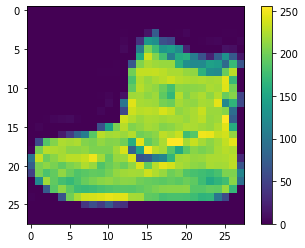

In [12]:
#show one image.
plt.figure()
plt.imshow(train_images[0])
#show color bar for reference.
plt.colorbar()
#no grid
plt.grid(False)
#Show
plt.show()

In [13]:
#scale the training and testing images from 0-255 to 0-1.
train_images = train_images/255.0
test_images = test_images/255.0

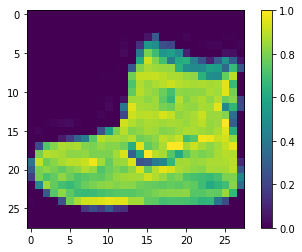

In [14]:
#show one image.
plt.figure()
plt.imshow(train_images[0])
#show color bar for reference.
plt.colorbar()
#no grid
plt.grid(False)
#Show
plt.show()

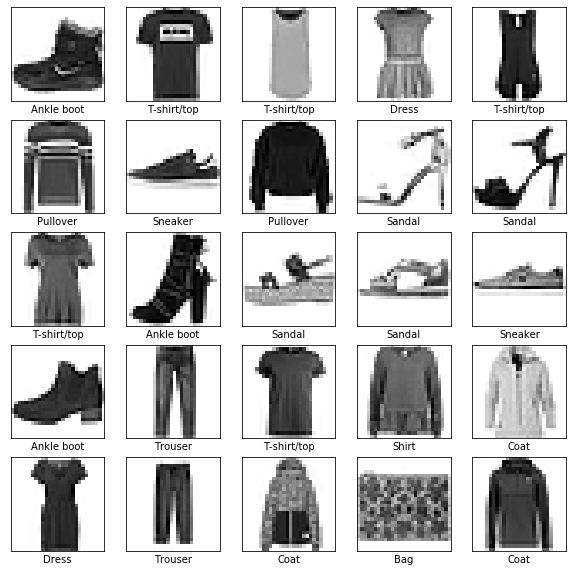

In [15]:
#images plotted to be seen with their respective labels.
plt.figure(figsize=(10,10))
for i in range(25):
    #build the subplot.
    plt.subplot(5,5,i+1)
    #
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [16]:
### BUILD MODEL.
#involves configuring layers then compiling the model.

In [17]:
#set up layers.
#the basic building block of an nn is the layer.
#layers extract representations from the data fed into them.

#most deep learning consists of chaining together simple layers.

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])

# The first layer transforms the format of the images from a 2D-array to a 1D array.
#   ie converts it from a stack of pixels to a line of pixels.
#   Flatten layer learns no parameters, it only reformats them.

#The next two layers are densely-connected or fully-connected.
#    the first has 128 neurons , the second is a softmax layer that returns an array of
#    10 probability scores that sum to 1.

In [19]:
#compile model.
#loss function,optimizer & metrics.
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [20]:
#see your model.
model.summary()
#how to calculate number of parameters.
#(no_of_input_nodes_per_next x no_of_next_nodes) + biases(or no.of next nodes)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [21]:
### TRAIN MODEL
#Steps : 
#1. Feed the training data to the model.
#2. The model learns to associate images and labels.
#3. Ask the model to make predictions about a test set - the test_images array.
#4. verify the predictions match the labels from test.

In [22]:
### Feed model / Train the model.
model.fit(train_images,train_labels,epochs=10)
#An epoch is one training cycle.


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 43s 717us/sample - loss: 0.4931 - accuracy: 0.8277
Epoch 2/10
60000/60000 [==============================] - 30s 507us/sample - loss: 0.3733 - accuracy: 0.8646
Epoch 3/10
60000/60000 [==============================] - 29s 483us/sample - loss: 0.3360 - accuracy: 0.8767
Epoch 4/10
60000/60000 [==============================] - 27s 456us/sample - loss: 0.3120 - accuracy: 0.8856
Epoch 5/10
60000/60000 [==============================] - 29s 480us/sample - loss: 0.2942 - accuracy: 0.8913
Epoch 6/10
60000/60000 [==============================] - 30s 503us/sample - loss: 0.2813 - accuracy: 0.8955
Epoch 7/10
60000/60000 [==============================] - 26s 440us/sample - loss: 0.2682 - accuracy: 0.9009
Epoch 8/10
60000/60000 [==============================] - 28s 461us/sample - loss: 0.2585 - accuracy: 0.9048
Epoch 9/10
60000/60000 [==============================] - 28s 475us/sample - loss: 0.2493 - accuracy: 0.9

In [ ]:
#Save model.

In [25]:
#Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy : ', test_acc)

# The accuracy on the test dataset is a little less than the accuracy on the training dataset.
#    That gap represents overfitting.

10000/1 - 4s - loss: 0.2373 - accuracy: 0.8861

Test accuracy :  0.8861


In [26]:
# Make predictions.
# with the model trained ,
# you can use it to make predictions about some images.

#logits - The vector of raw (non-normalized) predictions that a classification model generates, which is ordinarily then passed to a normalization function. 
           #If the model is solving a multi-class classification problem, logits typically become an input to the softmax function. 

In [27]:
# Make predictions without softmax layer attached.
predictions = model.predict(test_images)

In [28]:
print("Prediction for test image 1 (softmax absent) : \n",predictions[0])

#the prediction is label 9
np.argmax(predictions)

Prediction for test image 1 (softmax absent) : 
 [ -6.700203   -18.383394    -9.543508   -14.173154   -11.525099
   0.85560226  -8.703455     3.3782969   -7.1625466    7.4487133 ]


17208

In [29]:
# Make predictions with a softmax layer attached. 
# Attach a softmax layer to convert the logits to probabilities.
# NOTE , you can add layers after training.
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [30]:
print("Prediction for test image 1 (softmax present) : \n",predictions[0])

#machine's confidence.
np.argmax(predictions[0])

#actual test label
test_labels[0]

'''
comparing test accuracy is the cornerstone of testing generalisation.
'''

Prediction for test image 1 (softmax present) : 
 [7.0350598e-07 5.9336537e-12 4.0967151e-08 3.9976608e-10 5.6473159e-09
 1.3449688e-03 9.4900038e-08 1.6761178e-02 4.4307234e-07 9.8189259e-01]


'\ncomparing test accuracy is the cornerstone of testing generalisation.\n'

In [31]:
# Graph for all tests to look at the 10 set class predictions.
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap = plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]),color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

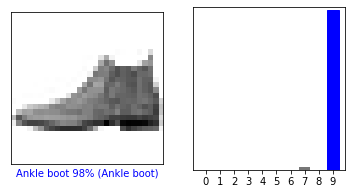

In [32]:
#Verify predictions.
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

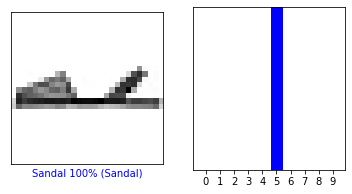

In [34]:
i = 111
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

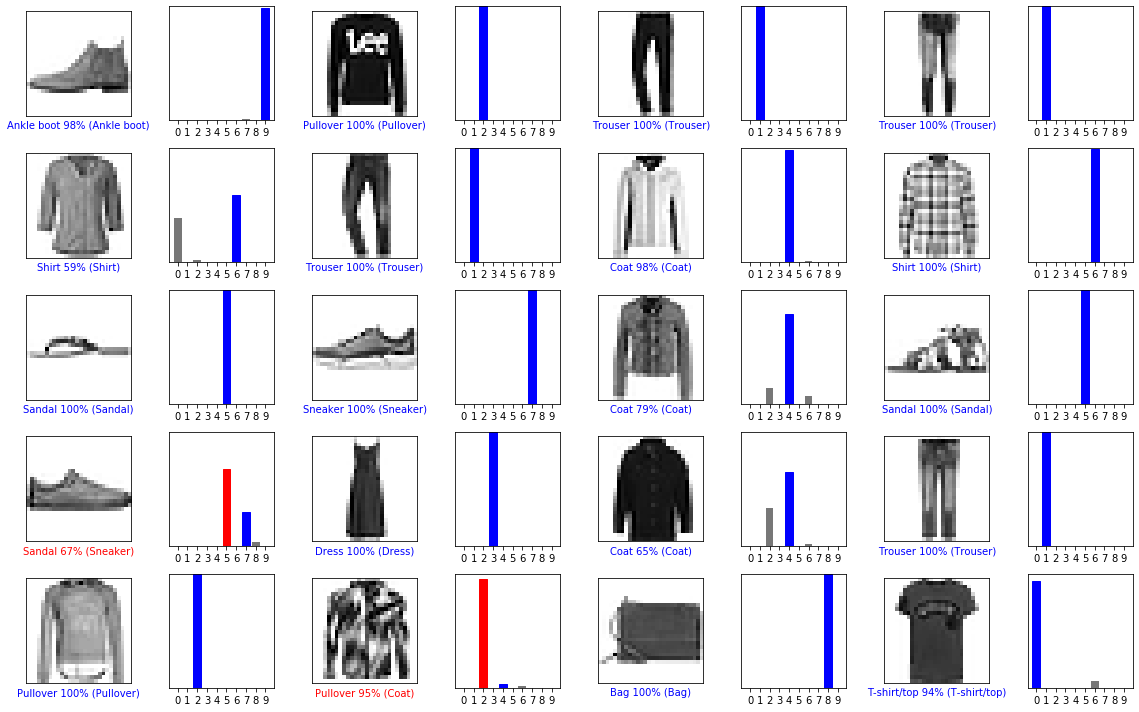

In [36]:
#Lets plot several images with their predictions.
#Note that the model can be wrong even when very confident.

#Plot the first X test images, their predicted labels, and the true labels.
#Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [37]:
# Use the trained model.
# Grab an image from the test dataset.
img = test_images[1]
print(img.shape)

(28, 28)


In [38]:
'''
tf.keras models are optimized to make
predictions on a batch or collection of examples at once.

Therefore, even a single image needs to be added to a list.
'''

#Add single image to list.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [39]:
#Predict the correct label.
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.3286237e-05 2.7495748e-16 9.9938881e-01 1.7904922e-10 1.9536015e-04
  1.0529042e-12 4.0250900e-04 2.8001275e-17 7.6191952e-12 7.8681294e-13]]


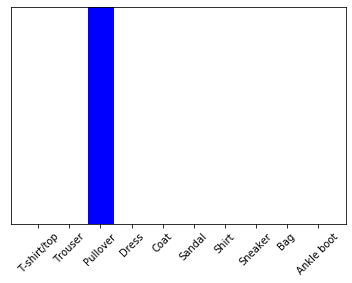

In [42]:
plot_value_array(1, predictions_single[0], test_labels) #plot_value_array 

_ = plt.xticks(range(10), class_names, rotation=45) # rotation of labels.